In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv('star_wars.csv')

In [38]:
df=df[df['RespondentID'].notna()]

In [39]:
for i in [1,2]:
    print(df[df.columns[i]].value_counts())

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [40]:
def yes_nofunc(column):
    yes_no = {'Yes':True, 'No':False}
    df[column] = df[column].map(yes_no)
    return df

In [41]:
df=yes_nofunc(df.columns[1])
df=yes_nofunc(df.columns[2])


In [52]:
col3_8=['seen_'+str(i) for i in range(1,7)]

In [55]:
df=df.rename(columns=dict(zip(df.columns[3:9], col3_8)))

In [69]:
df[df.columns[3:9]] = df[df.columns[3:9]].notnull()

In [74]:
df.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [75]:
col9_14=['ranking_'+str(i) for i in range(1,7)]

In [78]:
df=df.rename(columns=dict(zip(df.columns[9:15], col9_14)))

In [84]:
rankings = df[df.columns[9:15]]

In [96]:
rankings = rankings.fillna(0)


In [116]:
rankings = rankings.astype('int')

In [122]:
avg_movieratings = pd.DataFrame([(i,rankings[rankings[i]!=0][i].mean()) for i in rankings.columns], columns=['movie#','avg_rating'])

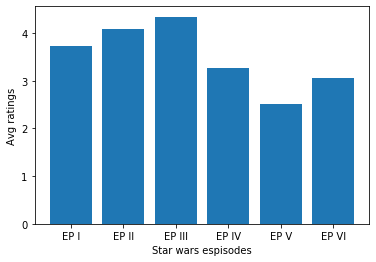

In [210]:
# avg_movieratings['avg_rating'].plot.bar()
epi = ['EP I', 'EP II', 'EP III', 'EP IV', 'EP V', 'EP VI']
plt.bar(epi,avg_movieratings['avg_rating'])
ax = plt.gca()
ax.set_ylabel('Avg ratings')
ax.set_xlabel('Star wars espisodes');


In [140]:
views = pd.DataFrame([(i,df[i].sum()) for i in df.columns[3:9]], columns=['movie#', 'no. of views'])

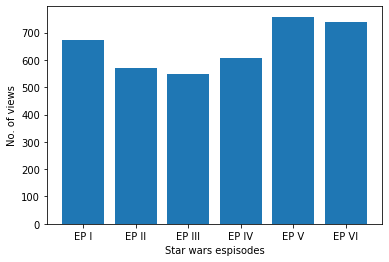

In [141]:
plt.bar(epi,views['no. of views'])
ax = plt.gca()
ax.set_ylabel('No. of views')
ax.set_xlabel('Star wars espisodes');

# STAR WAR FANS

In [145]:
df[df.columns[2]] = df[df.columns[2]].fillna(False)

In [184]:
updateddf = pd.merge(df[df.columns[2:9]], rankings, on=df.index).set_index('key_0')

In [185]:
starwar_fans = updateddf[updateddf[updateddf.columns[0]]==True]
rest = updateddf[updateddf[updateddf.columns[0]]==False]

In [188]:
view_list = []
for j in [starwar_fans, rest]:
    view_list.append([j[i].sum() for i in j.columns[1:7]])

In [189]:
view_list

[[500, 463, 450, 483, 538, 537], [173, 108, 100, 124, 220, 201]]

In [209]:
rating_list = []
for j in [starwar_fans, rest]:
    rating_list.append([j[j[i]!=0][i].mean() for i in j.columns[7:]])

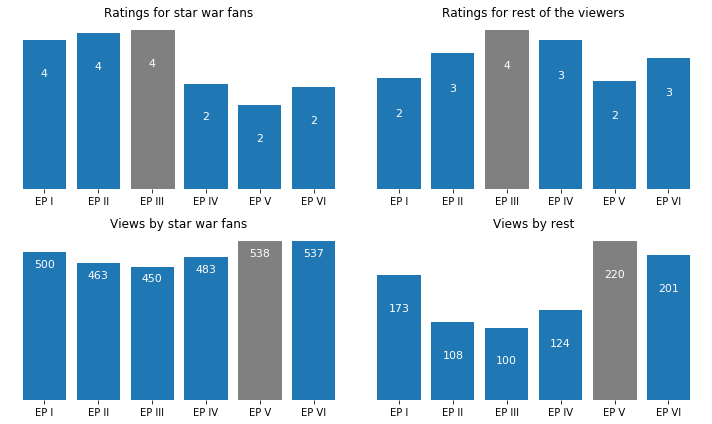

In [278]:

fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,  figsize=(10,6))


bar1 = ax1.bar(epi , rating_list[0])
ax1.set_title('Ratings for star war fans')

bar2 = ax2.bar(epi , rating_list[1])
ax2.set_title('Ratings for rest of the viewers')

bar3=ax3.bar(epi , view_list[0])
ax3.set_title('Views by star war fans')
bar4 = ax4.bar(epi , view_list[1])
ax4.set_title('Views by rest')




x=[(bar1,ax1,1),(bar2,ax2,1),(bar3,ax3,50),(bar4,ax4,50)]

for i in x:
    for bar in i[0]:

        height = bar.get_height()
        i[1].text(bar.get_x() + bar.get_width()/2, bar.get_height()-(1*i[2]) , str(int(height)), 
                     ha='center', color='w', fontsize=11)

        
        
    i[1].set_yticks([])
    for spine in i[1].spines.values():
        spine.set_visible(False)

    
    i[0][np.argmax([bar.get_height() for bar in i[0]])].set_color('grey')
    
    
    
plt.tight_layout()
